## Final Project
## Title : Alzheimer's Disease And Treatment
The goal of the project is to make the Alzheimers data visible throughout the country.
The first data collection, titled Alzheimer's Disease and Healthy Aging Data, shows the ranges of patients and cases in the USA.
With the help of the patient's details and age, as well as the data's confidence intervals, we may estimate the extent of their memory loss.
The remaining datasets, IDs, are helpful if another patient is experiencing the same problem(according to gene expression) and needs to see the treatment that was provided. However, because the data is restricted to the public, it is possible that the doctors may gain access and learn the specifics.
As gender is also a factor, a doctor may, if necessary, treat patients in accordance with their gender.

In [1]:
#The data we utilized here was downloaded from "Kaggle" and transferred to a data frame. I have imported the pandas library and called it "pd" while also reading the data from a file using the reading csv method.
#Achieved Data Accessing & Formats
import pandas as pd
df = pd.read_csv('Alzheimer_s_Disease_and_Healthy_Aging_Data.csv')

/opt/tljh/user/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3051: DtypeWarning: Columns (17,18) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [2]:
#Dropping the null rows and colums to filter dataset
print('Shape of Dataset before missing value treatment: ', df.shape)
# dropping all NaN's columns
df = df.dropna(axis=1, how="all")
# dropping rows with NaN samples
df = df.dropna(axis=0)
print('Shape of Dataset after missing value treatment: ', df.shape)

Shape of Dataset before missing value treatment:  (214462, 39)
Shape of Dataset after missing value treatment:  (290, 30)


In [3]:
#Displaying the top 5 rows as reference of the dataset
df.head()

,YearStart,YearEnd,LocationAbbr,LocationDesc,Datasource,Class,Topic,Question,Data_Value_Unit,DataValueTypeID,...,Stratification2,Geolocation,ClassID,TopicID,QuestionID,LocationID,StratificationCategoryID1,StratificationID1,StratificationCategoryID2,StratificationID2
24588,2015,2020,FL,Florida,BRFSS,Caregiving,Provide care for someone with cognitive impair...,Percentage of older adults who provided care f...,%,PRCTG,...,Female,POINT (-81.92896054 28.93204038),C07,TGC05,Q40,12,AGE,5064,GENDER,FEMALE
25402,2015,2020,FL,Florida,BRFSS,Caregiving,Provide care for someone with cognitive impair...,Percentage of older adults who provided care f...,%,PRCTG,...,Female,POINT (-81.92896054 28.93204038),C07,TGC05,Q40,12,AGE,65PLUS,GENDER,FEMALE
27164,2015,2020,FL,Florida,BRFSS,Caregiving,Provide care for someone with cognitive impair...,Percentage of older adults who provided care f...,%,PRCTG,...,Male,POINT (-81.92896054 28.93204038),C07,TGC05,Q40,12,AGE,AGE_OVERALL,GENDER,MALE
27782,2015,2020,FL,Florida,BRFSS,Caregiving,Provide care for someone with cognitive impair...,Percentage of older adults who provided care f...,%,PRCTG,...,"White, non-Hispanic",POINT (-81.92896054 28.93204038),C07,TGC05,Q40,12,AGE,65PLUS,RACE,WHT
28037,2015,2020,FL,Florida,BRFSS,Caregiving,Provide care for someone with cognitive impair...,Percentage of older adults who provided care f...,%,PRCTG,...,"White, non-Hispanic",POINT (-81.92896054 28.93204038),C07,TGC05,Q40,12,AGE,5064,RACE,WHT


In [4]:
# converting numerical column to float64
df["Low_Confidence_Limit"] = df["Low_Confidence_Limit"].astype('float64')
df["High_Confidence_Limit"] = df["High_Confidence_Limit"].astype('float64')

# mean of confidence limits
mean_low_confidence_limit = df["Low_Confidence_Limit"].mean()
mean_high_confidence_limit = df["High_Confidence_Limit"].mean()
print("Mean of Low Confidence Limit : ", round(mean_low_confidence_limit,3))
print("Mean of High Confidence Limit: ", round(mean_high_confidence_limit, 3))

# median of confidence limits
median_low_confidence_limit = df["Low_Confidence_Limit"].median()
median_high_confidence_limit = df["High_Confidence_Limit"].median()
print("Median Low Confidence Limit: ", round(median_low_confidence_limit,3))
print("Median High Confidence Limit: ", round(median_high_confidence_limit, 3))

# min value in confidence limits
min_low_confidence_limit = df["Low_Confidence_Limit"].min()
min_high_confidence_limit = df["High_Confidence_Limit"].min()
print("Min Low Confidence value: ", round(min_low_confidence_limit,3))
print("Min High Confidence value: ", round(min_high_confidence_limit, 3))

# max value in confidence limits
max_low_confidence_limit = df["Low_Confidence_Limit"].max()
max_high_confidence_limit = df["High_Confidence_Limit"].max()
print("Max Low Confidence value: ", round(max_low_confidence_limit,3))
print("Max High Confidence value: ", round(max_high_confidence_limit, 3))

Mean of Low Confidence Limit :  20.559
Mean of High Confidence Limit:  35.221
Median Low Confidence Limit:  20.6
Median High Confidence Limit:  34.9
Min Low Confidence value:  7.4
Min High Confidence value:  19.3
Max Low Confidence value:  35.6
Max High Confidence value:  61.3


In [5]:
#Showing the diversity
diversity_map = []
for index, column in enumerate(df.columns):
    unique_values = pd.unique(df.iloc[:, index])
    diversity_map.append((column,(len(unique_values)/df.shape[0])*100))
diversity_map = sorted(diversity_map, key= lambda x: x[1], reverse=True)
print(diversity_map)

[('High_Confidence_Limit', 47.241379310344826), ('Low_Confidence_Limit', 43.79310344827586), ('Data_Value', 42.41379310344828), ('Data_Value_Alt', 42.41379310344828), ('LocationAbbr', 4.827586206896552), ('LocationDesc', 4.827586206896552), ('Geolocation', 4.827586206896552), ('LocationID', 4.827586206896552), ('Stratification2', 2.0689655172413794), ('StratificationID2', 2.0689655172413794), ('YearStart', 1.0344827586206897), ('Stratification1', 1.0344827586206897), ('StratificationID1', 1.0344827586206897), ('YearEnd', 0.6896551724137931), ('StratificationCategory2', 0.6896551724137931), ('StratificationCategoryID2', 0.6896551724137931), ('Datasource', 0.3448275862068966), ('Class', 0.3448275862068966), ('Topic', 0.3448275862068966), ('Question', 0.3448275862068966), ('Data_Value_Unit', 0.3448275862068966), ('DataValueTypeID', 0.3448275862068966), ('Data_Value_Type', 0.3448275862068966), ('Data_Value_Footnote_Symbol', 0.3448275862068966), ('Data_Value_Footnote', 0.3448275862068966), 

In [6]:
#Calluculating the uniqueness
for index, column in enumerate(df.columns):
    unique_values = pd.unique(df.iloc[:, index])
    if len(unique_values) == 1:
        # columns with only one unique entry
        print("column: {} with redundant_value: {}".format(column, unique_values[0]))

column: Datasource with redundant_value: BRFSS
column: Class with redundant_value: Caregiving
column: Topic with redundant_value: Provide care for someone with cognitive impairment within the past month
column: Question with redundant_value: Percentage of older adults who provided care for someone with dementia or other cognitive impairment within the past month
column: Data_Value_Unit with redundant_value: %
column: DataValueTypeID with redundant_value: PRCTG
column: Data_Value_Type with redundant_value: Percentage
column: Data_Value_Footnote_Symbol with redundant_value: **
column: Data_Value_Footnote with redundant_value: Estimate is not comparable to those generated using data from years prior to 2019 due to survey question changes
column: StratificationCategory1 with redundant_value: Age Group
column: ClassID with redundant_value: C07
column: TopicID with redundant_value: TGC05
column: QuestionID with redundant_value: Q40
column: StratificationCategoryID1 with redundant_value: AGE


Text(0, 0.5, 'Number of Samples')

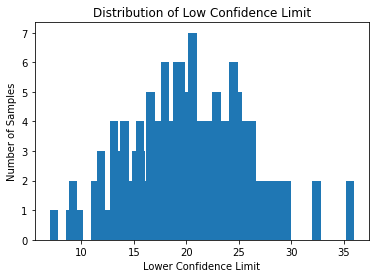

In [7]:
#ploting graph to data visualize
#Here I have imported standard libraries matplotlib.pyplot.
import matplotlib.pyplot as plt
import matplotlib
# Plotting Bar graph between Lower Confidence Limit and Number of samples collected
import seaborn as sns
df1 = df["Low_Confidence_Limit"].value_counts().reset_index()
df1 = df1.rename(columns = {'index':'Lower_limit'})
df2= df["High_Confidence_Limit"].value_counts().reset_index()
df2 = df2.rename(columns = {'index':'Higher_limit'})
plt.bar(df1.Lower_limit, df1["Low_Confidence_Limit"])
plt.title("Distribution of Low Confidence Limit")
plt.xlabel("Lower Confidence Limit")
plt.ylabel("Number of Samples")

Text(0, 0.5, 'Number of Samples')

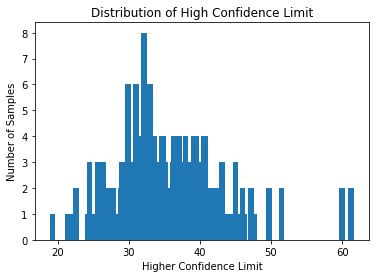

In [8]:
# Plotting Bar graph between High Confidence Limit and Number of samples collected

plt.bar(df2.Higher_limit, df2["High_Confidence_Limit"])
plt.title("Distribution of High Confidence Limit")
plt.xlabel("Higher Confidence Limit")
plt.ylabel("Number of Samples")

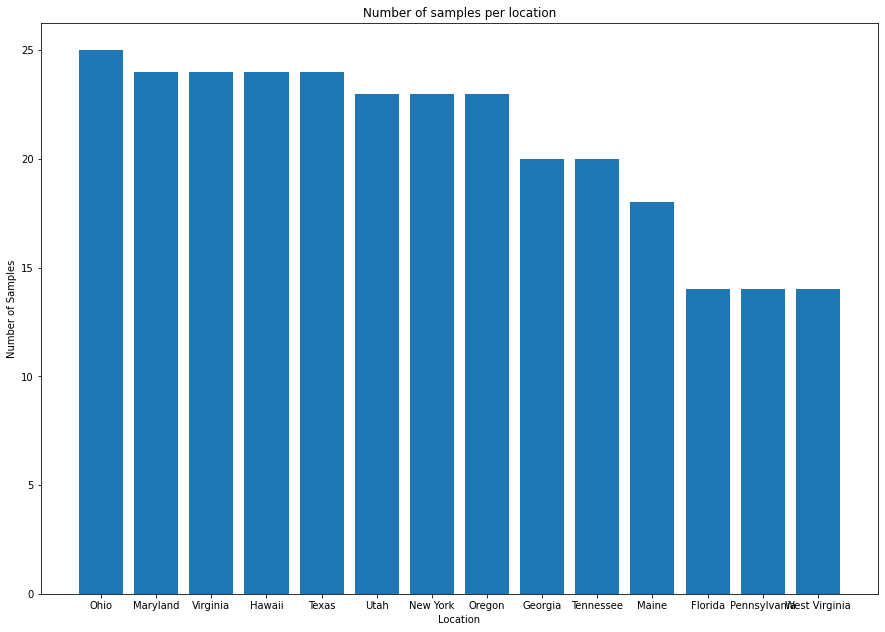

In [9]:
# Plotting Bar graph between Location and Number of samples collected
df1 = df["LocationDesc"].value_counts().reset_index()
df1 = df1.rename(columns = {'index':'state'})

fig = matplotlib.pyplot.gcf()
fig.set_size_inches(15, 10.5)

plt.bar(df1.state, df1.LocationDesc)
plt.title("Number of samples per location")
plt.xlabel("Location")
plt.ylabel("Number of Samples")
plt.show()

In [10]:
#Reading an CSV dataset of Alzheimers Data
alzheimersData = pd.read_csv('alzheimer_data.csv')
alzheimersData.shape

(373, 4)

In [11]:
#Achieving data Aggregartion by grouping  M/F column and displaying specific count for male and female category
alzheimersDataGrpByMF = alzheimersData.groupby(['M/F']).count()
display(alzheimersDataGrpByMF)

,Group,ID,Gene.title
M/F,,,
F,213,213,163
M,160,160,128


In [12]:
#Achieving data Aggregartion by grouping Group column
alzheimersDataGrpByGrp = alzheimersData.groupby(['Group']).count()
display(alzheimersDataGrpByGrp)

,ID,M/F,Gene.title
Group,,,
Converted,37,37,30
Demented,146,146,111
Nondemented,190,190,150


In [13]:
#Achieving data pivoting by showing specific values
alzheimersPivotData = alzheimersData.groupby(['M/F','Group'])['Gene.title'].count().reset_index()
display(alzheimersPivotData)

,M/F,Group,Gene.title
0,F,Converted,19
1,F,Demented,44
2,F,Nondemented,100
3,M,Converted,11
4,M,Demented,67
5,M,Nondemented,50


In [14]:
#Reading an CSV dataset of clinical Data
clinicalData= pd.read_csv('clinical_data_for_Alzheimers.csv')
clinicalData.shape

(1229, 7)

In [15]:
#Achieving feild level transformation by altering fields in the column
clinicalData[['x','y']] = clinicalData['dx1'].str.split(" ",expand=True)
clinicalData.head()

,ID,Gender,mmse,ageAtEntry,cdr,memory,dx1,x,y
0,OAS30124,female,16,79.14579,1.0,1,'AD Dementia','AD,Dementia'
1,OAS30124,female,21,79.14579,0.5,0.5,'AD Dementia','AD,Dementia'
2,OAS31129,female,20,68.07666,1.0,1,'AD Dementia','AD,Dementia'
3,OAS31129,female,28,68.07666,1.0,1,'AD Dementia','AD,Dementia'
4,OAS31129,female,29,68.07666,0.5,0.5,'AD Dementia','AD,Dementia'


In [16]:
#Grouping clinical data based on gender
clinicalDataGrpByGender = clinicalData.groupby(['Gender']).count()
display(clinicalDataGrpByGender)

,ID,mmse,ageAtEntry,cdr,memory,dx1,x,y
Gender,,,,,,,,
female,537,537,537,537,537,537,537,537
male,692,692,692,692,692,692,692,692


In [17]:
# Calluclating the percentage of males and females in the clinicaldata
# Which can also serve as a problem solving application for calluculating percentages in a specific column 
femaleCount = 0
maleCount = 0
for i in range (0,clinicalData.Gender.count()):
    if clinicalData.Gender[i] == "female":
        femaleCount = femaleCount + 1
    elif clinicalData.Gender[i] == "male":
        maleCount = maleCount + 1
        
totalCount = femaleCount + maleCount
ClinicalDataFemalePercentage = femaleCount/totalCount * 100 
ClinicalDataMalePercentage = maleCount/totalCount * 100 
print("Female Percentage in clinicalData is = ",round(ClinicalDataFemalePercentage,3))
print("Male Percentage in clinicalData is = ",round(ClinicalDataMalePercentage,3))

Female Percentage in clinicalData is =  43.694
Male Percentage in clinicalData is =  56.306


In [18]:
#Grouping clinical data based on gender and dx1 column and showing the specific gender and dx1 values
clinicalDataGrpByDx1 = clinicalData.groupby(['Gender','dx1'])['ageAtEntry'].count().reset_index()
display(clinicalDataGrpByDx1)

,Gender,dx1,ageAtEntry
0,female,'AD Dementia',378
1,female,'No dementia',16
2,female,'uncertain dementia',143
3,male,'AD Dementia',468
4,male,'No dementia',1
5,male,'uncertain dementia',223


In [19]:
#Joining alzheimers dataset and clinical dataset and displaying few sample rows
outerJoinResult = pd.concat([alzheimersData,clinicalData], axis=1, join='outer')
outerJoinResult.head()

,Group,ID,M/F,Gene.title,ID,Gender,mmse,ageAtEntry,cdr,memory,dx1,x,y
0,Nondemented,1552998_at,M,defensin beta 125,OAS30124,female,16,79.14579,1.0,1,'AD Dementia','AD,Dementia'
1,Nondemented,243690_at,M,TRIO and F-actin binding protein,OAS30124,female,21,79.14579,0.5,0.5,'AD Dementia','AD,Dementia'
2,Demented,205067_at,M,interleukin 1 beta,OAS31129,female,20,68.07666,1.0,1,'AD Dementia','AD,Dementia'
3,Demented,224267_x_at,M,zonadhesin (gene/pseudogene),OAS31129,female,28,68.07666,1.0,1,'AD Dementia','AD,Dementia'
4,Demented,0,M,period circadian clock 3 pseudogene,OAS31129,female,29,68.07666,0.5,0.5,'AD Dementia','AD,Dementia'


In [20]:
#Reading JSON data using read json
aiblData = pd.read_json('AIBL.json')
aiblData.shape

(820, 36)

In [21]:
#Displaying few details of aibl dataset
aiblData.head()

,APGEN1,APGEN2,CDGLOBAL,AXT117,BAT126,HMT3,HMT7,HMT13,HMT40,HMT100,...,LIMMTOTAL,LDELTOTAL,DXCURREN,DXNORM,DXMCI,DXAD,PTGENDER,Examyear,APTyear,PTDOBYear
0,4,4,1.0,6.99,345.619,4.29,4.8,164,15.0,34.9,...,3,0.0,0,0,0,1,1,2007,2007,1925
1,4,3,0.5,1.51,585.520,4.42,3.2,250,15.0,33.9,...,10,0.0,0,0,1,0,1,2008,2008,1930
2,4,3,0.0,2.84,838.974,3.92,5.1,226,12.9,32.9,...,18,19.0,1,1,0,0,2,2008,2008,1941
3,3,3,0.0,2.01,521.817,4.15,5.0,258,13.7,33.1,...,14,14.0,1,1,0,0,1,2008,2008,1934
4,3,2,0.5,3.59,290.049,4.23,6.9,269,13.5,32.0,...,7,2.0,0,0,1,0,2,2012,2012,1929


In [22]:
#Merging 3 data sets
#Displaying the result
result = pd.concat([alzheimersData,clinicalData,aiblData], axis=1, join='inner')
display(result)

,Group,ID,M/F,Gene.title,ID,Gender,mmse,ageAtEntry,cdr,memory,...,LIMMTOTAL,LDELTOTAL,DXCURREN,DXNORM,DXMCI,DXAD,PTGENDER,Examyear,APTyear,PTDOBYear
0,Nondemented,1552998_at,M,defensin beta 125,OAS30124,female,16,79.145790,1.0,1,...,3,0.0,0,0,0,1,1,2007,2007,1925
1,Nondemented,243690_at,M,TRIO and F-actin binding protein,OAS30124,female,21,79.145790,0.5,0.5,...,10,0.0,0,0,1,0,1,2008,2008,1930
2,Demented,205067_at,M,interleukin 1 beta,OAS31129,female,20,68.076660,1.0,1,...,18,19.0,1,1,0,0,2,2008,2008,1941
3,Demented,224267_x_at,M,zonadhesin (gene/pseudogene),OAS31129,female,28,68.076660,1.0,1,...,14,14.0,1,1,0,0,1,2008,2008,1934
4,Demented,0,M,period circadian clock 3 pseudogene,OAS31129,female,29,68.076660,0.5,0.5,...,7,2.0,0,0,1,0,2,2012,2012,1929
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
368,Demented,244093_at,M,F-box protein 32,OAS30019,female,29,74.379190,0.5,0.5,...,12,14.0,1,1,0,0,1,2008,2008,1943
369,Demented,1563453_at,M,NaN,OAS30408,male,24,76.084880,0.5,0.5,...,8,7.0,1,1,0,0,2,2010,2010,1942
370,Nondemented,212137_at,F,Bardet-Biedl syndrome 9,OAS30408,male,23,76.084880,0.5,0.5,...,17,14.0,1,1,0,0,2,2010,2010,1944
371,Nondemented,227944_at,F,NaN,OAS30157,female,26,65.804245,0.5,0.5,...,16,17.0,1,1,0,0,2,2013,2013,1939


In [23]:
#checking the info of the data frame result using info function
result.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 373 entries, 0 to 372
Data columns (total 49 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Group       373 non-null    object 
 1   ID          373 non-null    object 
 2   M/F         373 non-null    object 
 3   Gene.title  291 non-null    object 
 4   ID          373 non-null    object 
 5   Gender      373 non-null    object 
 6   mmse        373 non-null    object 
 7   ageAtEntry  373 non-null    float64
 8   cdr         373 non-null    float64
 9   memory      373 non-null    object 
 10  dx1         373 non-null    object 
 11  x           373 non-null    object 
 12  y           373 non-null    object 
 13  APGEN1      373 non-null    int64  
 14  APGEN2      373 non-null    int64  
 15  CDGLOBAL    373 non-null    float64
 16  AXT117      373 non-null    float64
 17  BAT126      373 non-null    float64
 18  HMT3        373 non-null    float64
 19  HMT7        373 non-null    f

In [24]:
#Modifing result dataset

print('Shape of Dataset before missing value treatment: ', result.shape)

# dropping all NaN's columns
data = result.dropna(axis=1, how="all")
# dropping rows with NaN samples
data = result.dropna(axis=0)

print('Shape of Dataset after missing value treatment: ', result.shape)

Shape of Dataset before missing value treatment:  (373, 49)
Shape of Dataset after missing value treatment:  (373, 49)


In [25]:
#Achieving data aggregationa nd pivoting by calluculating and displaying different stastical operators
# converting numerical column to float64
result["ageAtEntry"] =result["ageAtEntry"].astype('float64')
# average confidence limits'
mean_ageAtEntry = result["ageAtEntry"].mean()
median_ageAtEntry =result["ageAtEntry"].median()
min_ageAtEntry = result["ageAtEntry"].min()
max_ageAtEntry = result["ageAtEntry"].max()
print("Mean of ageAtEntry: ", round(mean_ageAtEntry,3))
print("Median of ageAtEntry: ", round(median_ageAtEntry,3))
print("Min of ageAtEntry: ", round(min_ageAtEntry,3))
print("Max of ageAtEntry: ", round(max_ageAtEntry,3))

Mean of ageAtEntry:  71.221
Median of ageAtEntry:  71.94
Min of ageAtEntry:  50.292
Max of ageAtEntry:  91.466


In [26]:
#Data Diversity for the result
diversity_map = []
for index, column in enumerate(result.columns):
    unique_values = pd.unique(result.iloc[:, index])
    diversity_map.append((column,(len(unique_values)/data.shape[0])*100))
diversity_map = sorted(diversity_map, key= lambda x: x[1], reverse=True)
print(diversity_map)

[('ID', 128.17869415807561), ('Gene.title', 99.65635738831615), ('BAT126', 77.66323024054984), ('AXT117', 74.22680412371135), ('HMT13', 58.075601374570454), ('HMT3', 49.140893470790374), ('ID', 36.769759450171826), ('ageAtEntry', 36.769759450171826), ('HMT7', 25.085910652920962), ('RCT6', 24.742268041237114), ('HMT100', 24.398625429553263), ('RCT392', 24.398625429553263), ('HMT40', 19.93127147766323), ('RCT20', 18.556701030927837), ('RCT11', 14.0893470790378), ('PTDOBYear', 13.402061855670103), ('HMT102', 11.34020618556701), ('mmse', 7.903780068728522), ('LIMMTOTAL', 7.903780068728522), ('LDELTOTAL', 7.560137457044673), ('MMSCORE', 6.872852233676976), ('Examyear', 2.7491408934707904), ('APTyear', 2.405498281786942), ('cdr', 1.718213058419244), ('memory', 1.718213058419244), ('CDGLOBAL', 1.718213058419244), ('Group', 1.0309278350515463), ('dx1', 1.0309278350515463), ('x', 1.0309278350515463), ('APGEN1', 1.0309278350515463), ('APGEN2', 1.0309278350515463), ('M/F', 0.6872852233676976), ('

In [27]:
#Defining a method that converts f to female and m to male
def modify(sample):
    if sample == "M":
        return 'male'
    if sample == "F":
        return 'female'

In [28]:
#Modifing the data of a coulum applying field level manupulation
result['M/F'] = result['M/F'].apply(lambda x: modify(x))

In [29]:
#Displaying the data after manupulation
result.head()

,Group,ID,M/F,Gene.title,ID,Gender,mmse,ageAtEntry,cdr,memory,...,LIMMTOTAL,LDELTOTAL,DXCURREN,DXNORM,DXMCI,DXAD,PTGENDER,Examyear,APTyear,PTDOBYear
0,Nondemented,1552998_at,male,defensin beta 125,OAS30124,female,16,79.14579,1.0,1,...,3,0.0,0,0,0,1,1,2007,2007,1925
1,Nondemented,243690_at,male,TRIO and F-actin binding protein,OAS30124,female,21,79.14579,0.5,0.5,...,10,0.0,0,0,1,0,1,2008,2008,1930
2,Demented,205067_at,male,interleukin 1 beta,OAS31129,female,20,68.07666,1.0,1,...,18,19.0,1,1,0,0,2,2008,2008,1941
3,Demented,224267_x_at,male,zonadhesin (gene/pseudogene),OAS31129,female,28,68.07666,1.0,1,...,14,14.0,1,1,0,0,1,2008,2008,1934
4,Demented,0,male,period circadian clock 3 pseudogene,OAS31129,female,29,68.07666,0.5,0.5,...,7,2.0,0,0,1,0,2,2012,2012,1929


In [30]:
#Defining a class that has a initializer which sets the location values for different lists which have names
#Defining a method that takes location and prints frequency

class frequensyOfSampleCollectedPerLoacation:
    def __init__(self):
        self.highFrequencyStates = ["Texas","Virginia","Maryland","Hawaii"]
        self.mediumFrequencyStates = ["Utah","oregon","New York"]
        self.lowerMediumFrequencyStates = ["Georgia","Tennesse"]
        self.lowerFrequencyStates = ["Florida","West Verginia","Pennsylvania"]
    def myfunc(self,location):
        if location == "Ohio":
            return "Highest no of sample collected here in " + location
        elif location in self.highFrequencyStates:
            return "second Highest no of sample collected here in " + location
        elif location in self.mediumFrequencyStates:
            return "Third Highest no of sample collected here in " + location
        elif location in self.lowerMediumFrequencyStates:
            return "Lower moderate no of sample collected here in " + location
        elif location == "Maine":
            return "Lower no of sample collected here in " + location
        elif location in self.lowerFrequencyStates:
            return "very lower no of sample collected here in " + location

In [ ]:
#Calling the method based on inputs
#Reads inputs from the user
import re
while(True):
        area = input("""Frequency of sample collection with respect to location(Choose Option):
        1.Ohio
        2.Texas
        3.Virginia
        4.Maryland
        5.Hawaii
        6.Utah
        7.oregon
        8.New York
        9.Georgia
        10.Tennesse
        11.Florida
        12.West Verginia
        13.Pennsylvania""")
        obj = frequensyOfSampleCollectedPerLoacation()
        if area == "1":
            print(obj.myfunc("Ohio"))
        elif area == "2":
            print(obj.myfunc("Texas"))
        elif area == "3":
            print(obj.myfunc("Virginia"))
        elif area == "4":
            print(obj.myfunc("Maryland"))
        elif area == "5":
            print(obj.myfunc("Hawaii"))
        elif area == "6":
            print(obj.myfunc("Utah"))
        elif area == "7":
            print(obj.myfunc("oregon"))
        elif area == "8":
            print(obj.myfunc("New York"))
        elif area == "9":
            print(obj.myfunc("Georgia"))
        elif area == "10":
            print(obj.myfunc("Tennesse"))
        elif area == "11":
            print(obj.myfunc("Florida"))
        elif area == "12":
            print(obj.myfunc("West Verginia"))
        elif area == "13":
            print(obj.myfunc("Pennsylvania"))
        else :
            print("Please enter the option mentioned above")